## Important Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset

In [13]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Standardize the features


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality for visualization using PCA


In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Find the optimal number of clusters using the Elbow Method


In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters


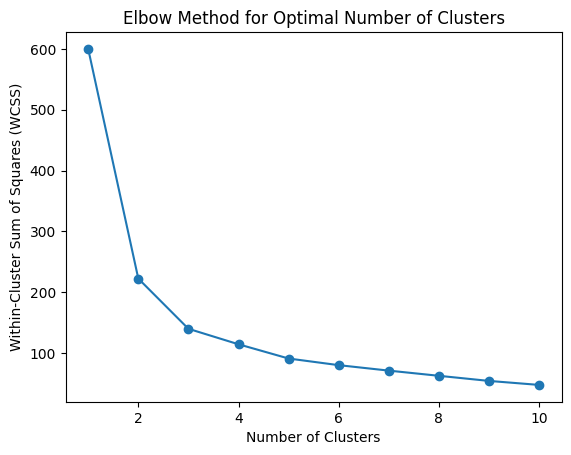

In [17]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [24]:
# Based on the Elbow Method, let's say we choose 3 clusters
optimal_num_clusters = 3

# Apply K-means clustering with the optimal number of clusters


In [25]:
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters


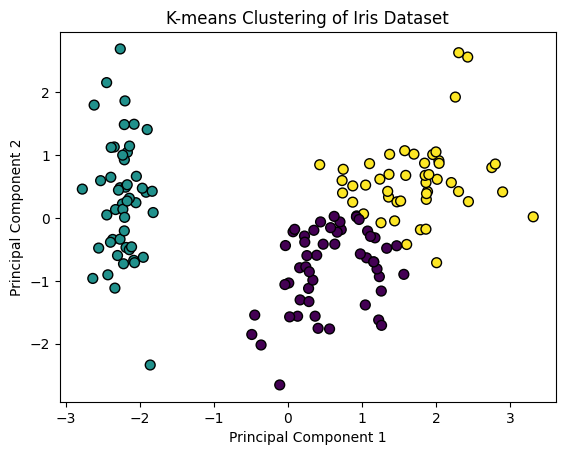

In [26]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()